In [1]:
import pandas as pd
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


/Users/moh/NeueFische/project-personality-druguse/Personality-vs-DrugUse/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('data/drug_consumption_clean.csv')
df.head()

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Semer,VSA,Addicted
0,0,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,1,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,...,1,0,0,0,0,0,0,0,0,1
2,2,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,3,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,0,0
4,4,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# removing columns for individual drugs
drug_columns = ['Amphet', 'Amyl', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Semer', 'VSA']
df = df.drop(drug_columns, axis = 1)
df.head()

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Addicted
0,0,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,1,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,2,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,3,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,4,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


In [4]:
# duplicate Target column with the name 'User'
df['User'] = df['Addicted']

In [5]:
# remove old column
df = df.drop(['Addicted'], axis = 1)


In [6]:
# removing an unnecessary column
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.head()
df.corr()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
0,35-44,female,Prof_cert,UK,White_Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,25-34,male,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,35-44,male,Prof_cert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,18-24,female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,35-44,female,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,User
Nscore,1.000000,-0.431535,0.007530,-0.217776,-0.392354,0.173384,0.078152,0.170631
Escore,-0.431535,1.000000,0.244784,0.158082,0.307570,0.113695,0.208322,-0.051876
Oscore,0.007530,0.244784,1.000000,0.036846,-0.058607,0.275363,0.419486,0.297526
Ascore,-0.217776,0.158082,0.036846,1.000000,0.245438,-0.229945,-0.208319,-0.175912
Cscore,-0.392354,0.307570,-0.058607,0.245438,1.000000,-0.336175,-0.230334,-0.269953
Impulsive,0.173384,0.113695,0.275363,-0.229945,-0.336175,1.000000,0.622500,0.293221
SS,0.078152,0.208322,0.419486,-0.208319,-0.230334,0.622500,1.000000,0.388803
User,0.170631,-0.051876,0.297526,-0.175912,-0.269953,0.293221,0.388803,1.000000


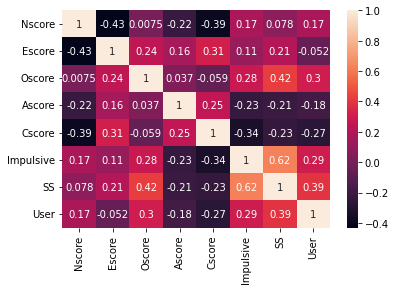

In [8]:
sns.heatmap(df.corr(), annot=True);

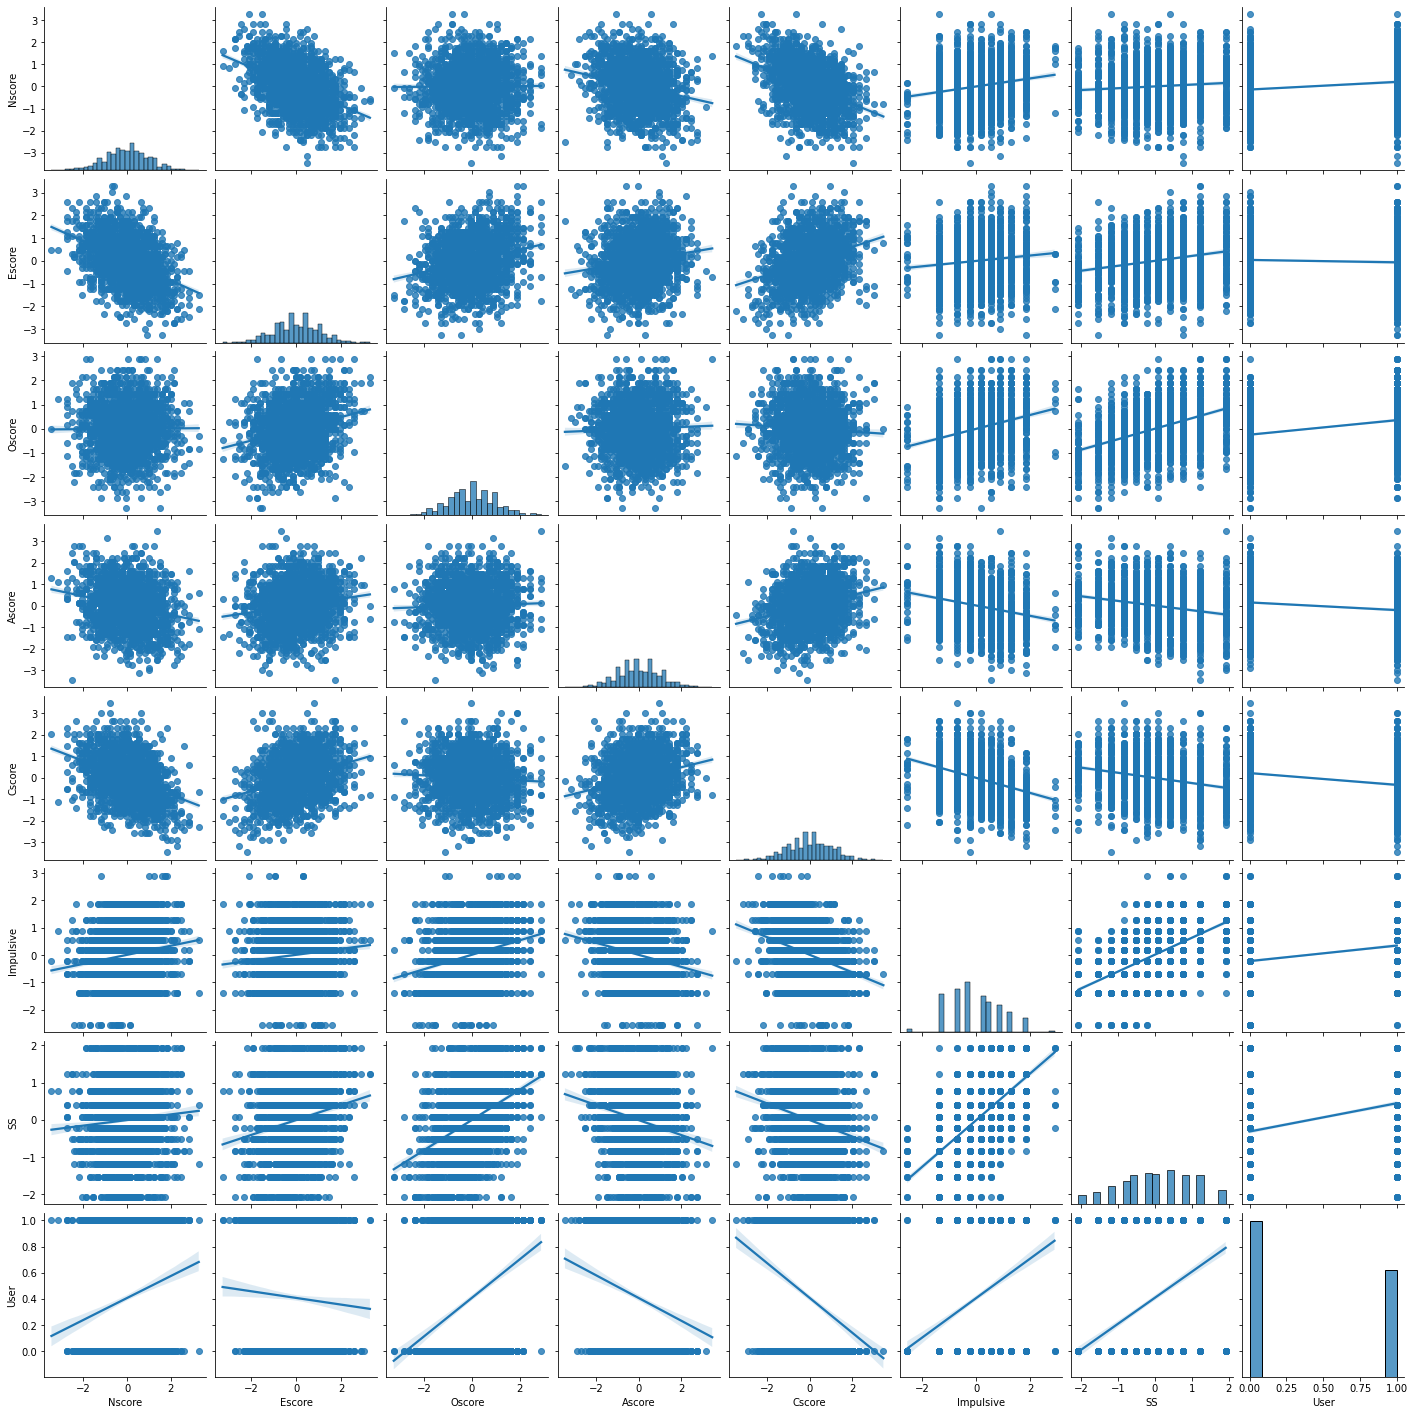

In [9]:
sns.pairplot(df, kind='reg')

In [10]:
# Define non-categorical variables
non_cat_vars = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Define categorical variables
cat_vars = [col for col in df.columns.to_list() if col not in non_cat_vars]

# Cast variable type for categorical variables
for feat in cat_vars:
    df[feat] = df[feat].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        1877 non-null   category
 1   Gender     1877 non-null   category
 2   Education  1877 non-null   category
 3   Country    1877 non-null   category
 4   Ethnicity  1877 non-null   category
 5   Nscore     1877 non-null   float64 
 6   Escore     1877 non-null   float64 
 7   Oscore     1877 non-null   float64 
 8   Ascore     1877 non-null   float64 
 9   Cscore     1877 non-null   float64 
 10  Impulsive  1877 non-null   float64 
 11  SS         1877 non-null   float64 
 12  User       1877 non-null   category
dtypes: category(6), float64(7)
memory usage: 115.3 KB


In [11]:
# replacing categorical features with dummy columns
for i in df.columns:
    if i != 'User':
        if df[i].dtype == 'category':
            df = pd.get_dummies(df, columns=[i], prefix=i, prefix_sep="_", drop_first=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Nscore                          1877 non-null   float64 
 1   Escore                          1877 non-null   float64 
 2   Oscore                          1877 non-null   float64 
 3   Ascore                          1877 non-null   float64 
 4   Cscore                          1877 non-null   float64 
 5   Impulsive                       1877 non-null   float64 
 6   SS                              1877 non-null   float64 
 7   User                            1877 non-null   category
 8   Age_25-34                       1877 non-null   uint8   
 9   Age_35-44                       1877 non-null   uint8   
 10  Age_45-54                       1877 non-null   uint8   
 11  Age_55-64                       1877 non-null   uint8   
 12  Age_65+             

In [13]:
# Define non-categorical variables
non_cat_vars = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Define categorical variables
cat_vars = [col for col in df.columns.to_list() if col not in non_cat_vars]

# Cast variable type for categorical variables
for feat in cat_vars:
    df[feat] = df[feat].astype('category')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Nscore                          1877 non-null   float64 
 1   Escore                          1877 non-null   float64 
 2   Oscore                          1877 non-null   float64 
 3   Ascore                          1877 non-null   float64 
 4   Cscore                          1877 non-null   float64 
 5   Impulsive                       1877 non-null   float64 
 6   SS                              1877 non-null   float64 
 7   User                            1877 non-null   category
 8   Age_25-34                       1877 non-null   category
 9   Age_35-44                       1877 non-null   category
 10  Age_45-54                       1877 non-null   category
 11  Age_55-64                       1877 non-null   category
 12  Age_65+             

In [14]:
# Starting applying the ML models
from sklearn.model_selection import train_test_split

RSEED = 42
y=df['User']
X=df.drop('User', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)


In [15]:
X_train.shape, X_test.shape

((1407, 33), (470, 33))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt




In [17]:
lr_model = LogisticRegression(random_state=RSEED)
nb_gaus_model = GaussianNB()
nb_catg_model = CategoricalNB() #failed! does not accept negative values
nb_comp_model = ComplementNB()  #failed! does not accept negative values
knn_model = KNeighborsClassifier()
svm_model = LinearSVC(max_iter=2000, random_state=RSEED)
svc_model = SVC(random_state=RSEED)
dt_model = DecisionTreeClassifier(random_state=RSEED)
et_model = ExtraTreeClassifier(random_state=RSEED)
rf_model = RandomForestClassifier(random_state=RSEED)
ada_model = AdaBoostClassifier(random_state=RSEED)
xgb_model = XGBClassifier(enable_categorical=True)  #failed!



In [18]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)


LogisticRegression(random_state=42)

[[237  42]
 [ 57 134]]
Accuracy = 0.79
Recall = 0.7
Precision = 0.76
f1_score = 0.73
f1_beta = 0.71


GaussianNB()

[[262  17]
 [128  63]]
Accuracy = 0.69
Recall = 0.33
Precision = 0.79
f1_score = 0.46
f1_beta = 0.37


KNeighborsClassifier()

[[230  49]
 [ 61 130]]
Accuracy = 0.77
Recall = 0.68
Precision = 0.73
f1_score = 0.7
f1_beta = 0.69


LinearSVC(max_iter=2000, random_state=42)

[[238  41]
 [ 55 136]]
Accuracy = 0.8
Recall = 0.71
Precision = 0.77
f1_score = 0.74
f1_beta = 0.72


SVC(random_state=42)

[[227  52]
 [ 52 139]]
Accuracy = 0.78
Recall = 0.73
Precision = 0.73
f1_score = 0.73
f1_beta = 0.73


DecisionTreeClassifier(random_state=42)

[[222  57]
 [ 73 118]]
Accuracy = 0.72
Recall = 0.62
Precision = 0.67
f1_score = 0.64
f1_beta = 0.63


ExtraTreeClassifier(random_state=42)

[[215  64]
 [ 72 119]]
Accuracy = 0.71
Recall = 0.62
Precision = 0.65
f1_score = 0.64
f1_beta = 0.63


RandomForestClassifier(random_state=42)

[[232  47]
 [ 52 139]]
Accuracy = 0.79
Recall = 0.73
Precision = 0.75
f1_score = 0.74
f1_beta = 0.73


AdaBoostClassifier(random_state=42)

[[235  44]
 [ 56 135]]
Accuracy = 0.79
Recall = 0.71
Precision = 0.75
f1_score = 0.73
f1_beta = 0.72


LogisticRegression(random_state=42)

GaussianNB()

KNeighborsClassifier()

LinearSVC(max_iter=2000, random_state=42)

SVC(random_state=42)

DecisionTreeClassifier(random_state=42)

ExtraTreeClassifier(random_state=42)

RandomForestClassifier(random_state=42)

AdaBoostClassifier(random_state=42)

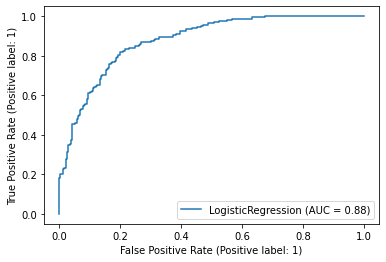

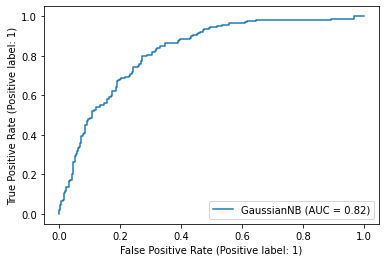

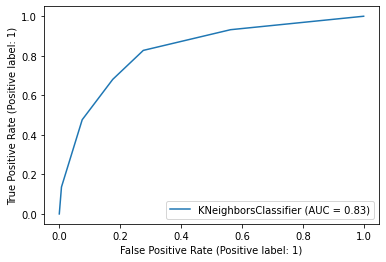

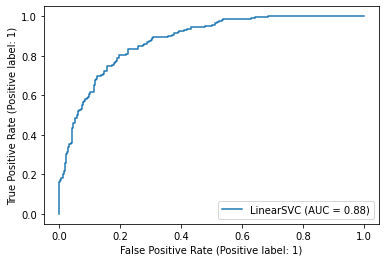

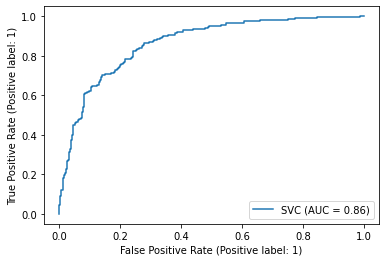

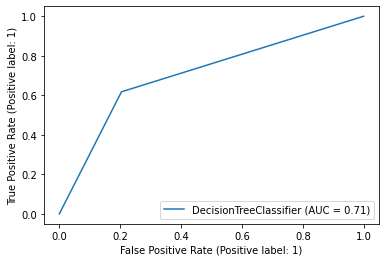

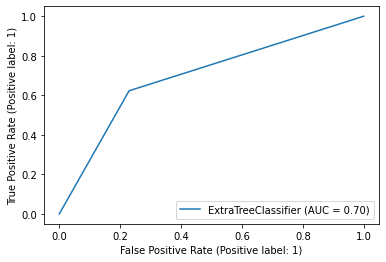

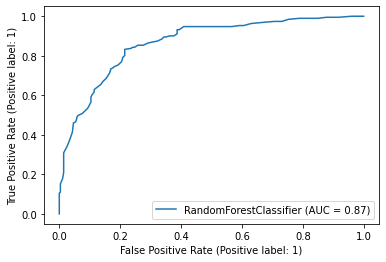

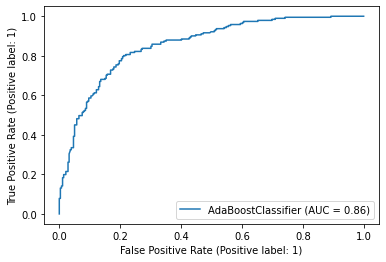

In [19]:
beta = 2
models = [  lr_model, nb_gaus_model, knn_model, svm_model, 
            svc_model, dt_model, et_model, rf_model, ada_model]
for model in models:
    print("="*50)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    Recall = recall_score(y_test,y_pred)
    Precision = precision_score(y_test,y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    F_score = f1_score(y_test,y_pred)
    F_beta = (1 + beta**2) * Recall * Precision/(Recall + Precision * beta**2)
    print(cm)
    #print(classification_report(y_test,y_pred))
    print(f"Accuracy = {round(Accuracy,2)}")
    print(f"Recall = {round(Recall,2)}")
    print(f"Precision = {round(Precision,2)}")
    print(f"f1_score = {round(F_score,2)}")
    print(f"f1_beta = {round(F_beta,2)}")

for model in models:
    print("="*50)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plot_roc_curve(model, X_test, y_test) 

# F_beta values
### Log Reg : 0.71
### GaussianNB : 0.37
### KNeighborsClassifier : 0.69
### LinearSVC : 0.72
### SVC : 0.73
### DecisionTree : 0.63
### ExtraTree : 0.63
### RandomForest : 0.73
### Adaboost : 0.72

Naive Bayes assumes that predictors are conditionally independent => this might not be the case here (SS and Impulsive for example). Could this explain the bad results from NB?

# Grid-parameter search for RandomForestClassifier 

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,20],
    'criterion' :['gini', 'entropy']
}
rf_model = RandomForestClassifier(random_state=RSEED)
CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5, scoring=ftwo_scorer)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_score_


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring=make_scorer(fbeta_score, beta=2))

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

0.7367480058873557

make_scorer(fbeta_score, beta=2)

# Best score for RandomForest is 0.74 
<br>
Best parameters for this score are : {'criterion': 'gini','max_depth': 8,'max_features': 'auto','n_estimators': 500}

# Grid-parameter search for SVCClassifier 

In [21]:


param_grid = {"kernel": ["rbf", "linear"], "gamma": [1e-2, 1e-3, 1e-4], "C": [1, 10, 100]}
CV_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv= 5, scoring=ftwo_scorer)
CV_svc.fit(X_train, y_train)
CV_svc.best_params_

CV_svc.scorer_ , CV_svc.best_score_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring=make_scorer(fbeta_score, beta=2))

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

(make_scorer(fbeta_score, beta=2), 0.7582889141837523)

# Best score for SVC is 0.76 
<br>
## Best parameters are {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

TODO:
- optimize hyperparameters further
- ensemble models
